# Lifecycle
* This notebook implements first part of lifecycle process i.e Data Analysis or Exploratory Data Analysis (EDA).
* Following is the list of lifecycle processes.
    * **Data Analysis or EDA** (Content of this notebook)
    * Feature Engineering
    * Feature Selection
    * Pipelining
    * Model Selection and Building
    * Model Deployment
* All these are performed on a very famous kaggle competition known as House Price Prediction.

# Exploratory Data Analysis (EDA)
* Import the libraries
* Set Theme for seaborn
* Fetched training and test dataset
* Get intuition about the features containing NaN values.
* Relationship of NaN values of different feature with SalePrice.
* Relationship of **temporal** features with SalePrice.
* Separate Numerical and Categorical Features
* For numerical, get insights about the discrete features.
* Get the distribution of continuous features.
* Get the relationship between continuous feature and SalePrice.
* Check for correlation between (continuous and discrete features) and SalePrice.
* For categorical, get bar charts for relationship between different categories of different features and SalePrice.
* Check for outliers using boxplots.
* Apply Log transform on continuous features and repeat the steps.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
colors = ['r', 'g', 'b'] # Searborn colors (red, green and blue)
# Note that there is no relation of value with the colors, these are just used to beautify the results.

In [3]:
X_train = pd.read_csv("../input/home-data-for-ml-course/train.csv")
X_test = pd.read_csv("../input/home-data-for-ml-course/test.csv")

In [4]:
# Get few records on training set
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* As we can see there are multiple columns that have some NaN values.
* Further there are not just numerical features, there are some categorical features also.

In [5]:
# Get the shape
X_train.shape

(1460, 81)

In [6]:
# Drop the id column as it is not required
X_train = X_train.drop("Id", axis=1)

In [7]:
X_train["PoolQC"].isna().sum() # Just checking for correctness

1453

# Null Values

In [8]:
# NaN Values in features
features_with_null_values = []
n_rows = len(X_train.index)
for feature in X_train.columns:
    sum_nan = X_train[feature].isna().sum()
    if sum_nan > 0:
        percentage_nan = sum_nan*100/n_rows
        print(feature, "{0:.3f}%".format(percentage_nan))
        features_with_null_values.append(feature)
    else:
        pass

LotFrontage 17.740%
Alley 93.767%
MasVnrType 0.548%
MasVnrArea 0.548%
BsmtQual 2.534%
BsmtCond 2.534%
BsmtExposure 2.603%
BsmtFinType1 2.534%
BsmtFinType2 2.603%
Electrical 0.068%
FireplaceQu 47.260%
GarageType 5.548%
GarageYrBlt 5.548%
GarageFinish 5.548%
GarageQual 5.548%
GarageCond 5.548%
PoolQC 99.521%
Fence 80.753%
MiscFeature 96.301%


* As we can see that there are a lot of features that have more than 70% missing values.
* Along with this there are features that have less than 10% as missing values.
* All these would be taken care in the feature engineering session.

In [9]:
# List of features with NaN Values
features_with_null_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<AxesSubplot:>

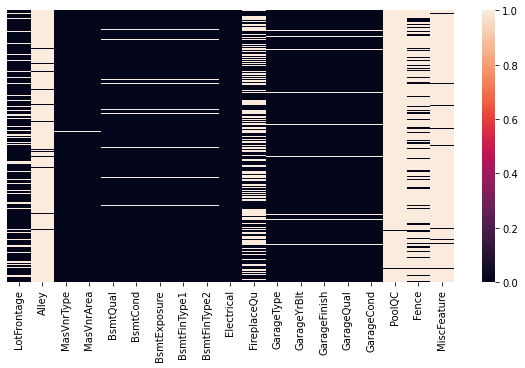

In [10]:
# Visualization for features with null values
plt.figure(figsize=(10,5))
sns.heatmap(X_train[features_with_null_values].isna(), yticklabels=False)

### Interpretation
* We can see that Alley, FlreplaceQu, PoolQC, Fence and MiscFeature has a lot of missing values.
* This is also evident from the percentage values.

* The below code plots the relationship between null values and median SalePrice.
* We choose median because there may be outliers we don't have information about.
* Because of them, the mean can be drastically different/skewed whereas median is not susceptible to outliers.

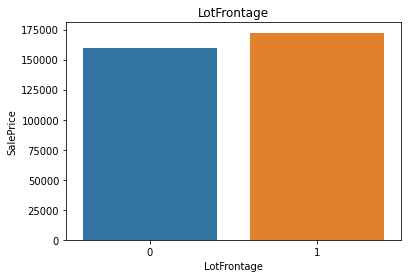

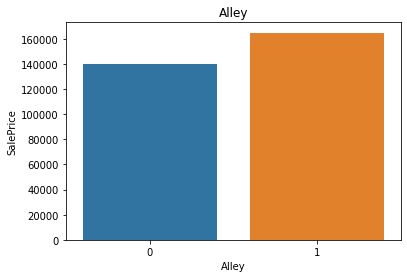

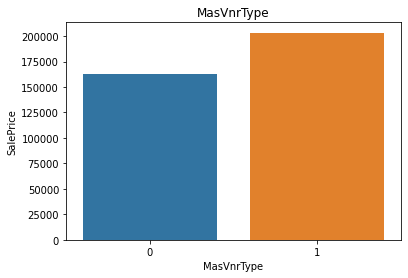

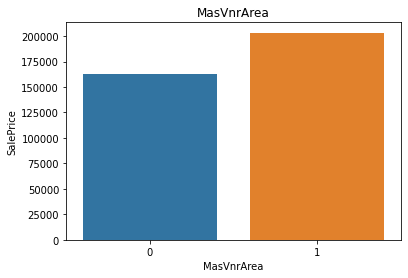

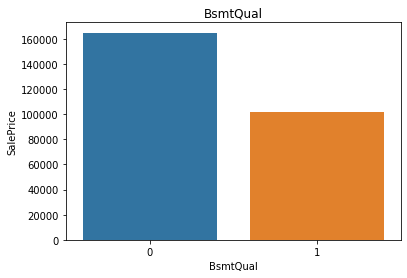

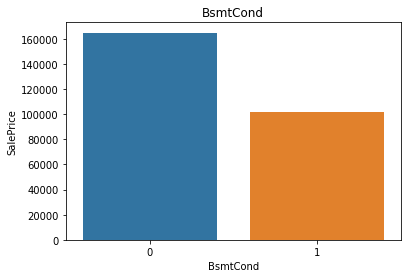

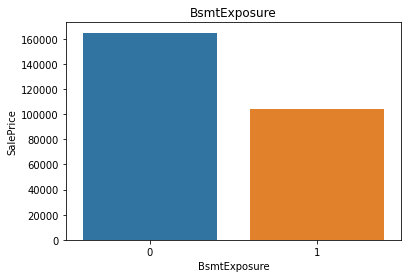

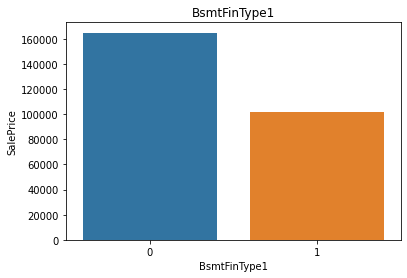

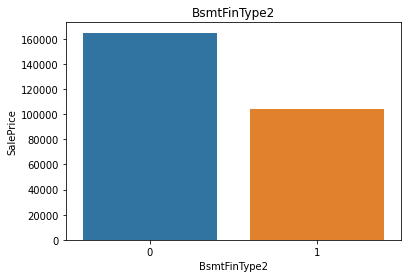

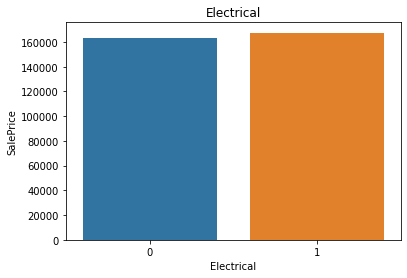

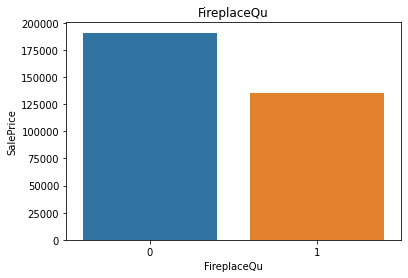

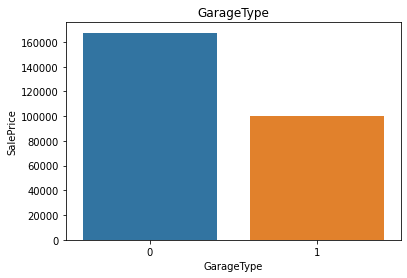

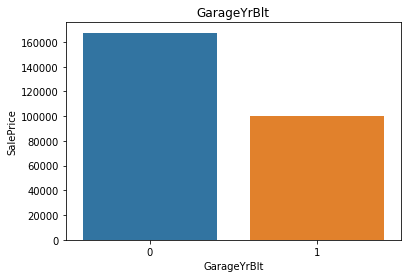

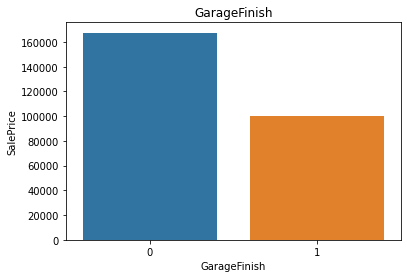

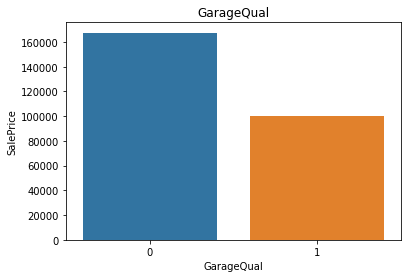

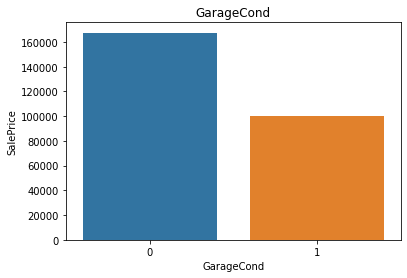

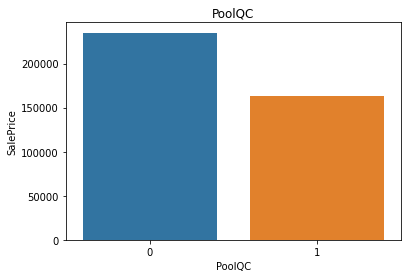

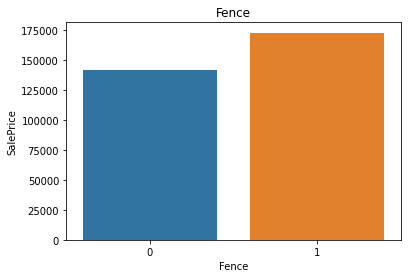

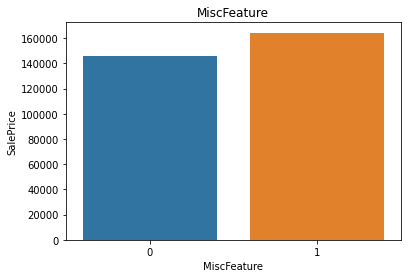

In [11]:
# Relationship between Null values and response variable
for feature in features_with_null_values:
    # Copy the dataset
    X = X_train.copy()
    
    # Place 1 where missing values are found and 0 where not
    X[feature] = np.where(X[feature].isnull(), 1, 0)
    
    # Median is used for plotting because there might be outliers which may change mean.
    data = X.groupby(feature)['SalePrice'].median()
    data = pd.DataFrame(data) # Convert Series to DataFrame
    sns.barplot(x=data.index, y=data.SalePrice) # Plot bar chart
    plt.title(feature)
    plt.show()

* From the above graphs it is clear that a lot of features that have missing values are strongly related to SalePrice.
* This can be concluded as in some of the features, the median of SalePrice is higher for null values than for not-null values.
* This indicates that not all missing values can be ignored and we can create a new category (if the feature it corresponds to is a categorical feature) called "Others".

# Temporal Variables

In [12]:
# Analysing Years
# First get the columns that contains either "Year" or "Yr"
feature_with_year = []

for feature in X_train.columns:
    if "Yr" in feature or "Year" in feature:
        feature_with_year.append(feature)

feature_with_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

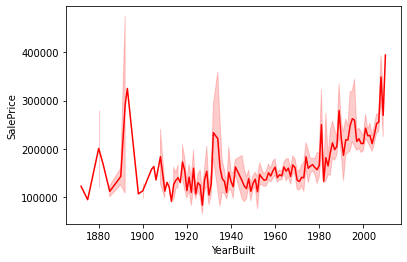

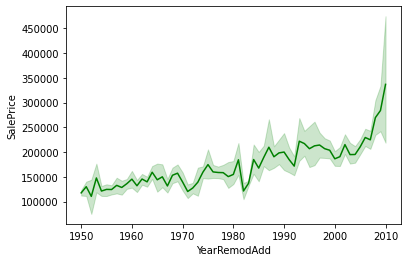

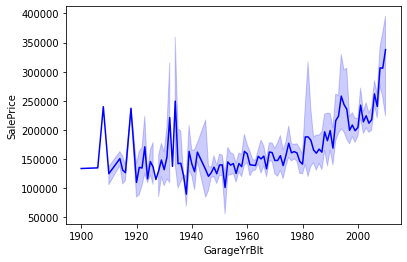

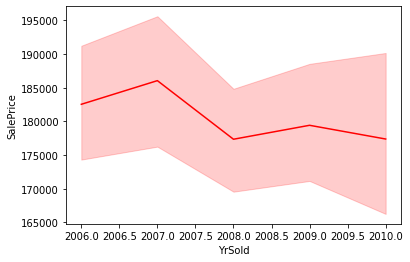

In [13]:
# Analysing the years
i=0
for feature in feature_with_year:
    sns.lineplot(x = X_train[feature], y = X_train['SalePrice'], color=colors[i%3])
    plt.show()
    i += 1

### Interpretation
* From the above plots, we can see that as the recent years approach, the SalePrice increase.
* However this is not the case for the last one.
* Ee can clearly see that there is a decrease in sale price as the year is increased.
* Lets confirm this.

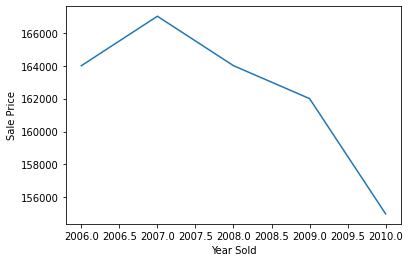

In [14]:
# Confirm whether sale price is actually decreasing or not.
X_train.groupby("YrSold")['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Sale Price")
plt.show()

* As evident from the above graph, the sale price does decrease as number of years go by.
* This is quite counterintuitive as the price should increase.
* Thus, we would see the relation between each "Year" feature with "YrSold"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


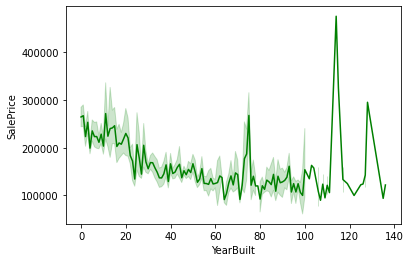

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


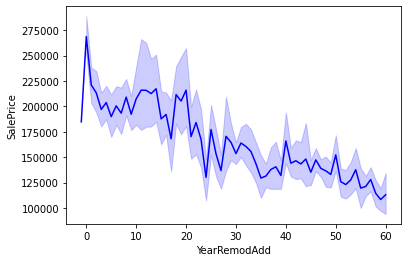

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


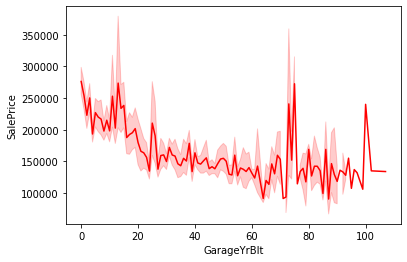

In [15]:
for feature in feature_with_year:
    if feature == "YrSold":
        continue
    # This line of code plots the line graph between NumberOfYears and SalePrice for each "Year" feature
    sns.lineplot(X_train['YrSold'] - X_train[feature], X_train['SalePrice'], color=colors[i%3])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()
    i+=1

### Interpretation
* Sale Price decreases if a house built is older compared to newer ones.
* Same for Garage Built and RemodAdd.
* Now, this is quite intuitive. As the house becomes older, the 
* Further, it provides some idea/insights about what is actually happening in the data.

# Numerical and Categorical Features

In [16]:
# Separate Numerical and Categorical Features
numerical_features = []
categorical_features = []
for feature in X_train.columns:
    if X_train[feature].dtypes == 'O': # Categorical feature if datatype is object.
        categorical_features.append(feature)
    else: # Numerical if otherwise
        numerical_features.append(feature)

print("Numerical Features are: ", numerical_features)
print("\n\nCategorical Features are: ", categorical_features)

Numerical Features are:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Categorical Features are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'F

In [17]:
# Code to just check one or two
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
# Seperate Discrete Features with continuous one in numerical features
discrete_features = []
continuous_features = []
for feature in numerical_features:
    if len(X_train[feature].unique()) <= 10 and feature not in feature_with_year:
        discrete_features.append(feature)
    elif feature not in feature_with_year:
        continuous_features.append(feature)

print("Discrete Features are: ", discrete_features)

Discrete Features are:  ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea']


### Explanations
* In above code there are two conditions.
* One is obvious that column should not be an year as there is a possibility that year might have less than 10 unique values.
* Other one is that number of unique classes/values must be less than 10 i.e 10 is the threshold for discrete features.
* Based on that we obtained a list of features which can be considered for discrete features.
* Now, lets see the relationship between them and SalePrice.

# Discrete Features

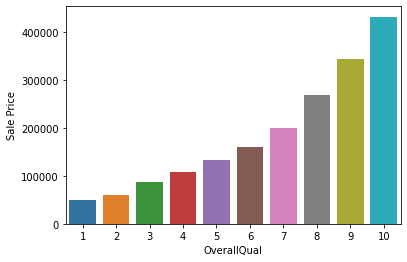

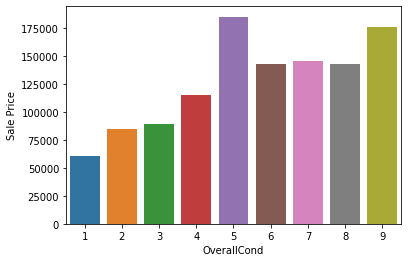

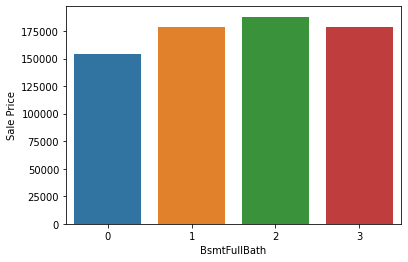

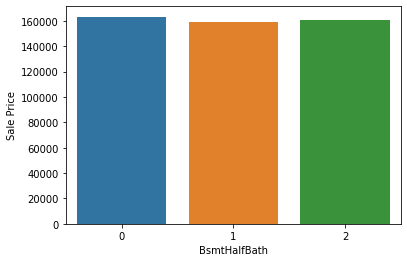

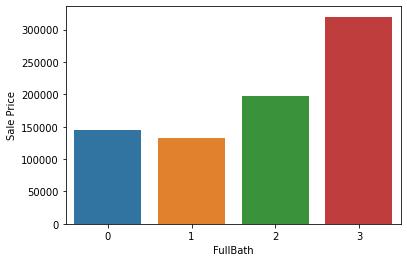

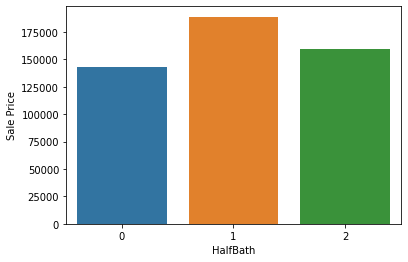

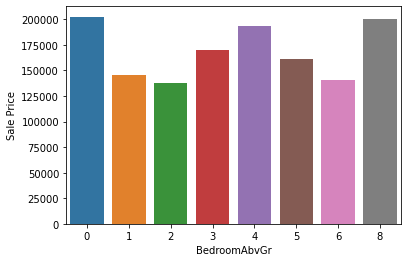

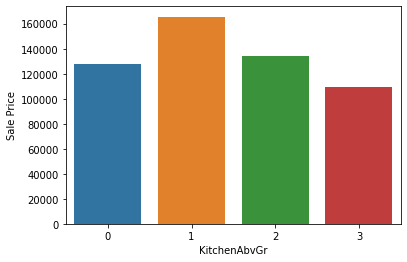

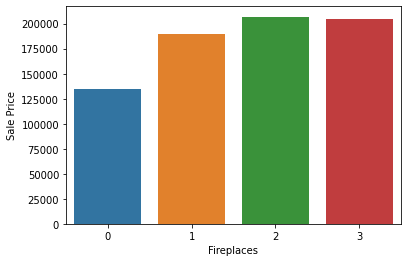

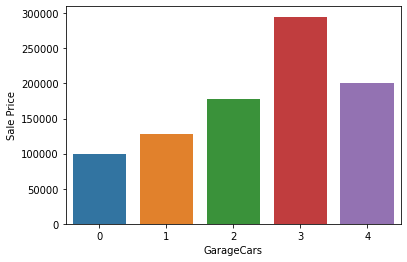

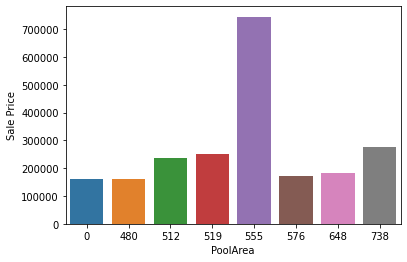

In [19]:
for feature in discrete_features:
    data = X_train.groupby(feature)['SalePrice'].median()
    data = pd.DataFrame(data) # Convert Series to DataFrame
    sns.barplot(x = data.index, y = data.SalePrice)
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

### Interpretations
* The first graph proves that there is some relationship between discrete features and SalePrice.
* It shows that the overall SalePrice increases exponentially as the overall quality increases.
* This provides an idea about the distribution of the overall quality.
* Other graphs show unpredictable patterns but at least we know that there is some realtionship between them and SalePrice (though they can't be identified right now).

# Continuous features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


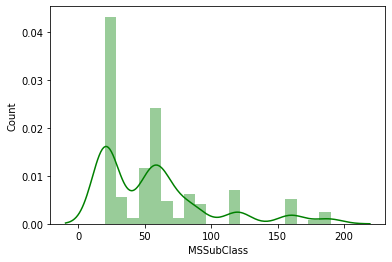

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


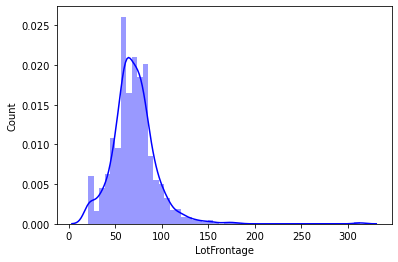

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


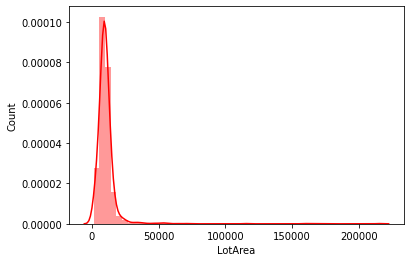

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


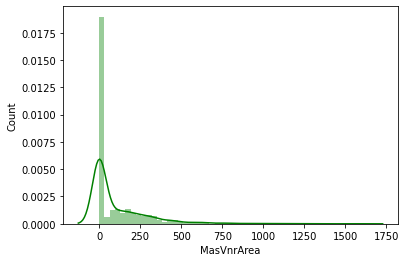

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


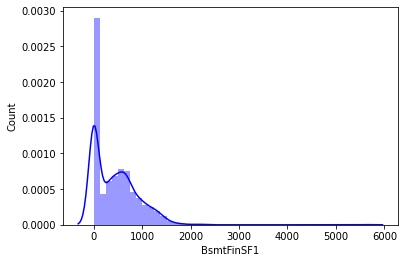

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


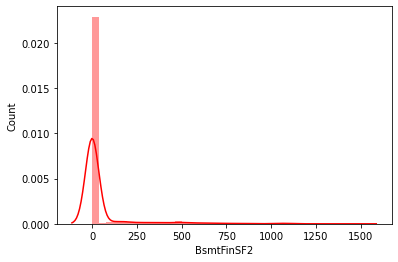

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


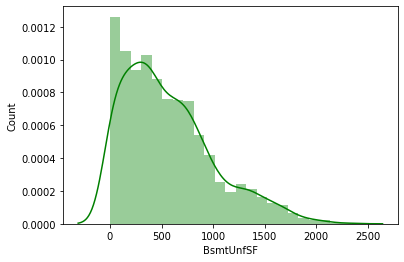

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


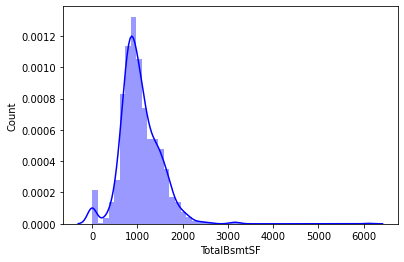

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


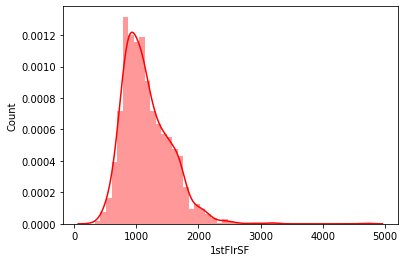

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


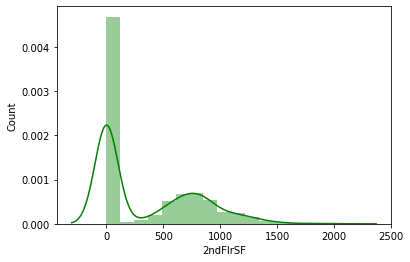

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


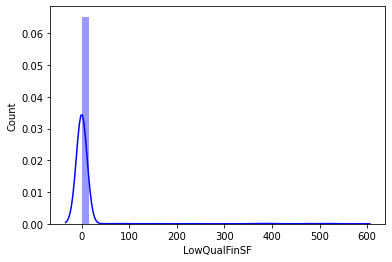

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


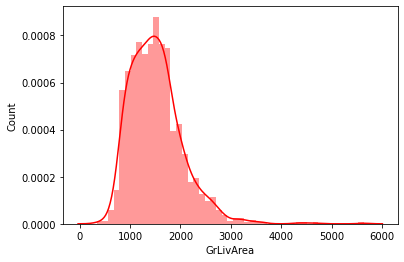

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


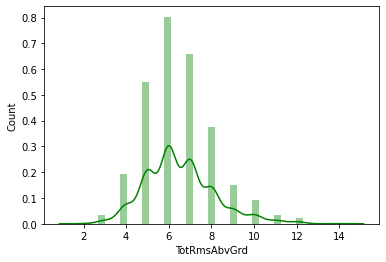

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


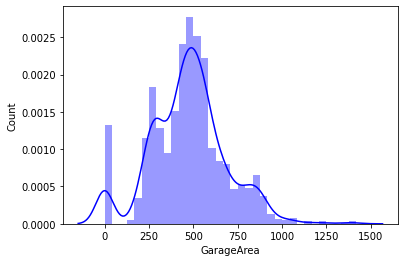

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


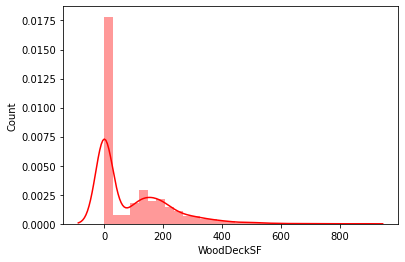

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


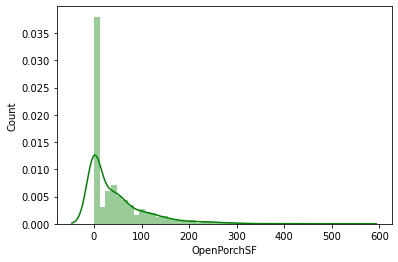

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


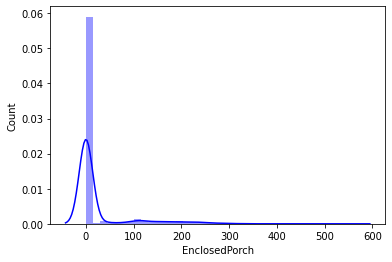

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


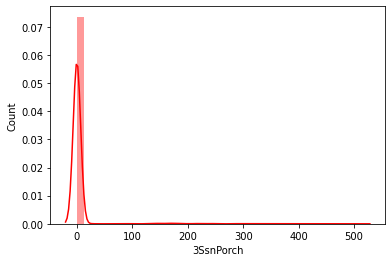

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


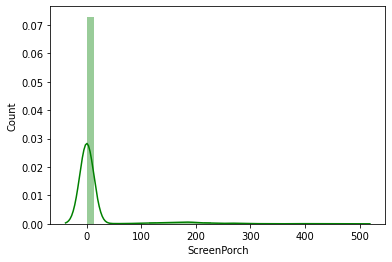

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


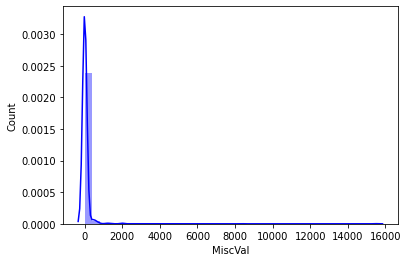

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


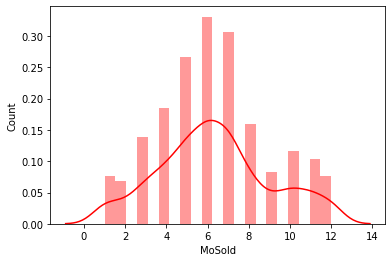

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


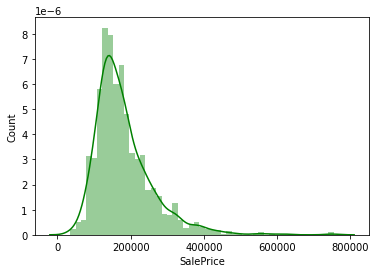

In [20]:
# Analysis for continuous features
for feature in continuous_features:
    sns.distplot(X_train[feature], kde=True, color=colors[i%3])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
    i+=1

### Interpretation
* Here we can see that many of the features have skewed normal distribution like LotArea.
* Can use logarithmic transform to make it less skewed or even normal distribution.
* Others have either bimodal or multimodal distribution.
* This helps in checking out assumtions regarding some models and we can use other testing methods for other than guassian distribution.
* Further, features like TotRmsAbvGrd seems to have discrete values. This might mean that we need to increase our threshold to 15 instead of 10.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


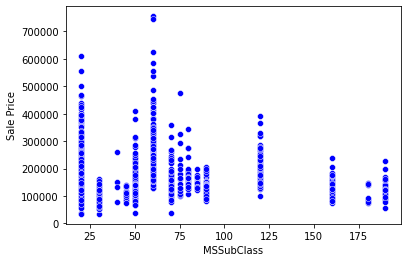

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


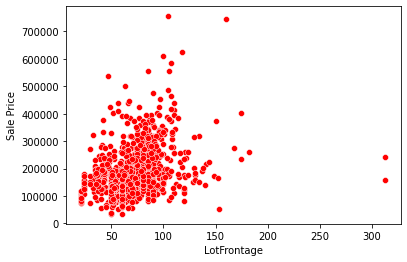

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


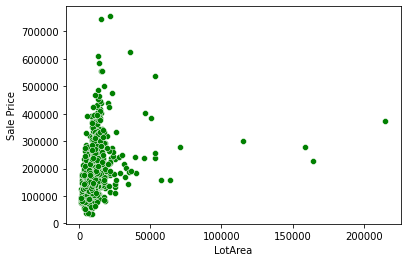

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


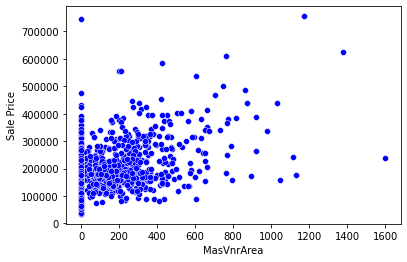

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


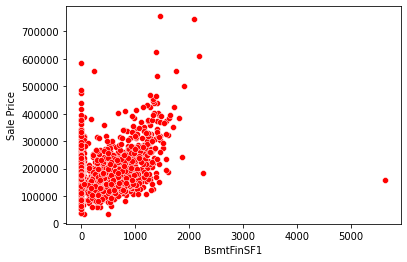

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


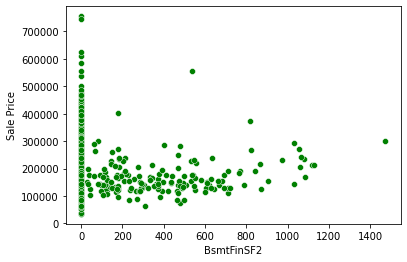

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


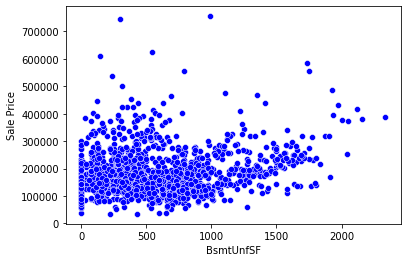

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


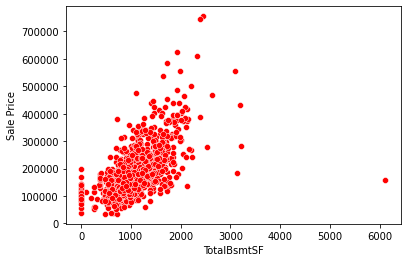

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


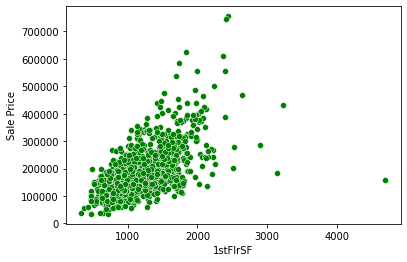

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


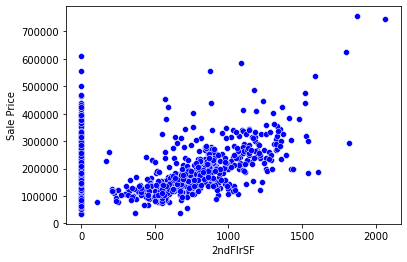

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


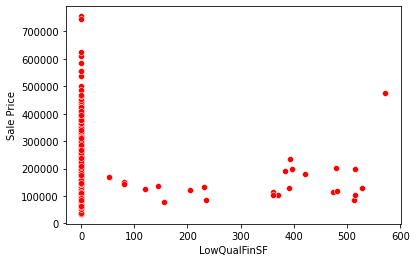

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


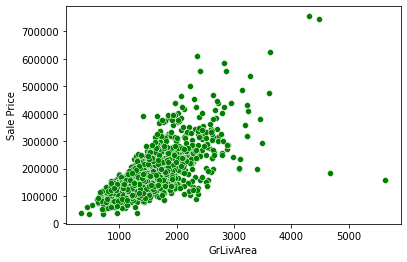

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


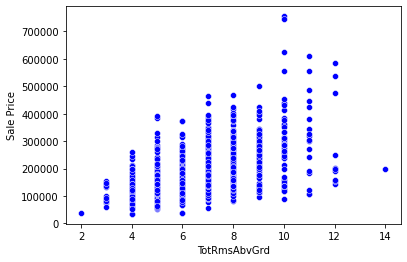

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


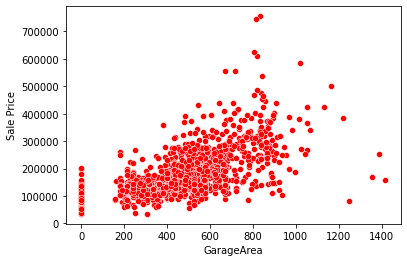

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


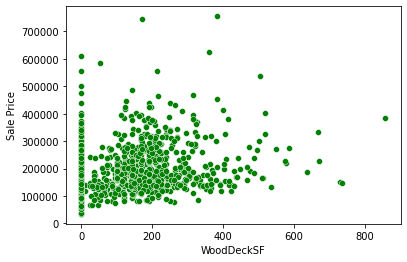

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


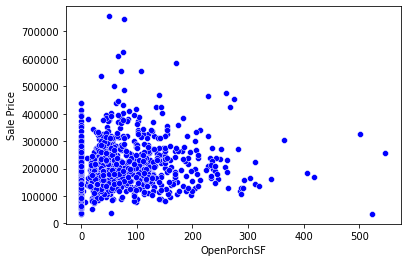

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


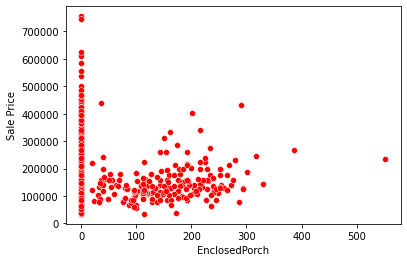

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


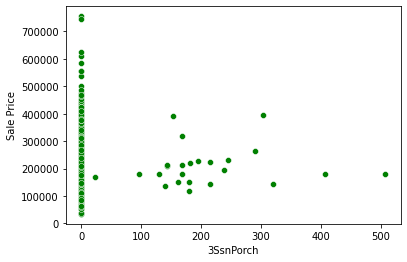

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


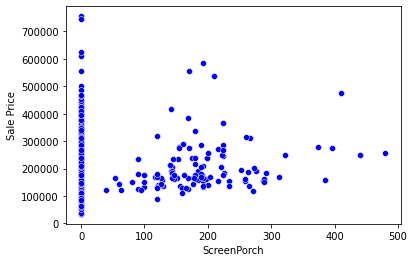

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


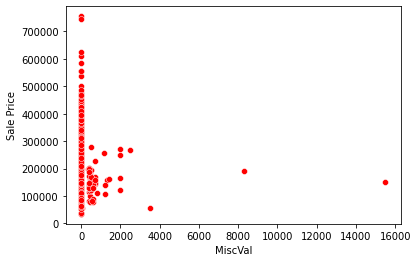

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


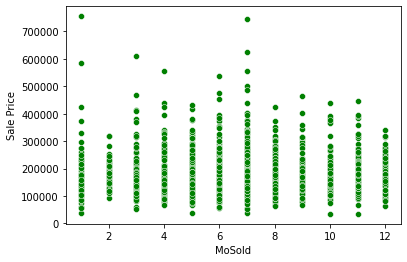

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


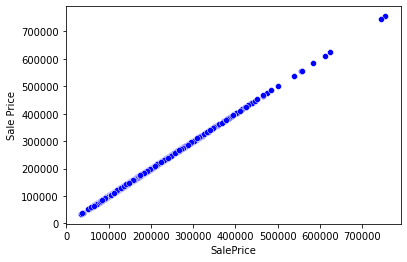

In [21]:
for feature in continuous_features:
    sns.scatterplot(X_train[feature], X_train["SalePrice"], color=colors[i%3])
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()
    i+=1

### Interpretation
* Firstly note that there are still some other discrete features like TotRmsAbvGrd, MoSold, MSSubClass etc.
    * This shows that we must increase threshold for discrete features to 15.
    * This also shows that this step should be done immediately after separating discrete and continuous features.
* This also proves the fact the most of the features are **skewed** and **needs log transform**.

In [22]:
# Again Calculating Discrete and Continuous Features but with updated threshold.
discrete_features = []
continuous_features = []
for feature in numerical_features:
    if len(X_train[feature].unique()) <= 15 and feature not in feature_with_year:
        discrete_features.append(feature)
    elif feature not in feature_with_year:
        continuous_features.append(feature)

## Correlation
* This is one of the most important step that also helps in feature selection.
* Calculated as covariance of two variables divided by the product of std dev of each feature.
* Correlation tells us whether one of multiple features depend on another feature.
* It is useful because it can also help in imputing missing values.
    * Suppose you have two features that have high positive correlation.
    * And further suppose that one of the feature has some missing values.
    * We can easily drop that feature without much loss of information.
    * This happens because of correlation.
* Further, we can say that two variables are highly correlated if they have correlations above 0.5 or 0.7 depeneds on the threshold that we set.
* However, features that have correlation below 0.5 must not be considered as correlated features.
* Multicollinearity - Happens when one feature can be predicted by other or combination of other features with high accuracy.
* This leads to skewed results.

> Which models are/are-not affected by correlation?
* Decision Trees and Boosted Trees algorithm are not affected by correlation as their algorithm doesn't make any assumptions about it.
* Further, for decision trees when it splits, the model takes into account, the tree that will choose only one of the perfectly correlated features.
* Logistic Regression and Linear Regression are affected by this problem.

* There are two methods to detect correlation
    * Pearson Correlation Coefficient - Used when there is roughly linear relationship between features.
    * Spearman Correlation Coefficient - Used when there is non-linear relationship between features.

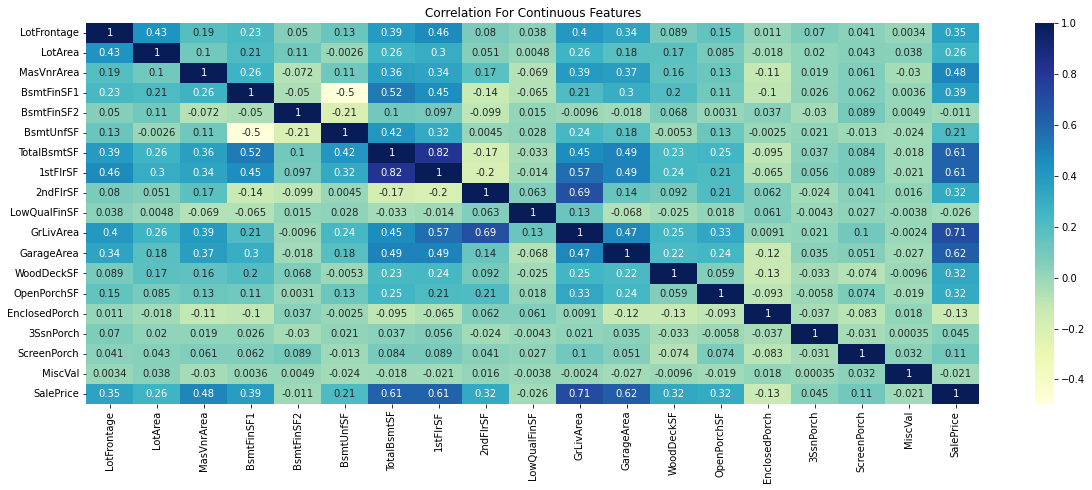

In [23]:
# Correlation between continuous features
plt.figure(figsize = (20,7))
sns.heatmap(X_train[continuous_features].corr(), cmap="YlGnBu", annot = True)
plt.title("Correlation For Continuous Features")
plt.show()

### Interpretations
* We can see that there is some correlation but not much between each pair of predictors.
* Further there are some features like GrLivArea which have good correlation with SalePrice.
* However, there might be some correlation error because of null values if any. Hence it should be done again after missing values are handled.

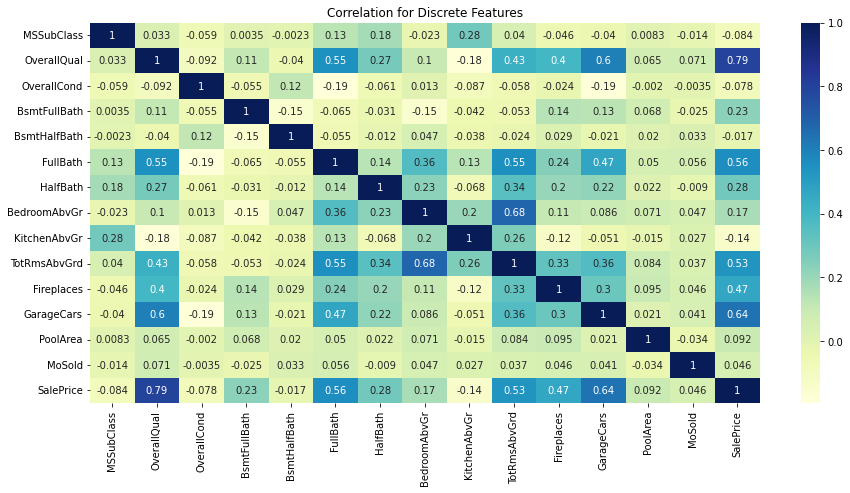

In [24]:
# Check correlation for discrete with SalePrice
X_discrete = pd.concat([X_train[discrete_features], X_train['SalePrice']], axis=1)
plt.figure(figsize = (15, 7))
sns.heatmap(X_discrete.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation for Discrete Features")
plt.show()

### Interpretation
* There is a strong correlation between SalePrice and OverallQual.
* This was also evident from the discrete bar charts because of the exponential rise.
* Further, we will have to look at it again after handling the missing values.

# Categorical Features

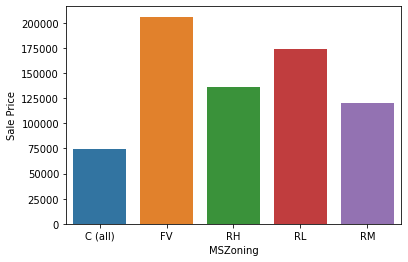

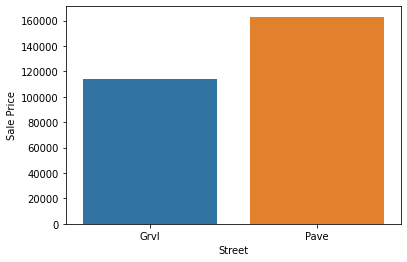

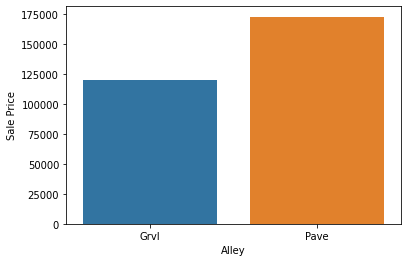

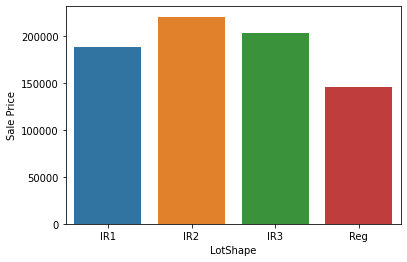

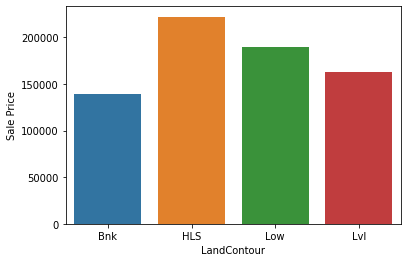

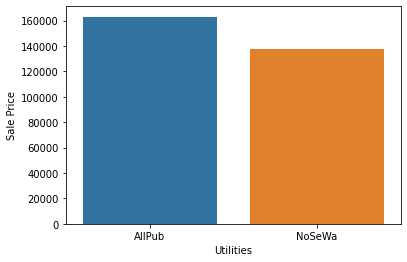

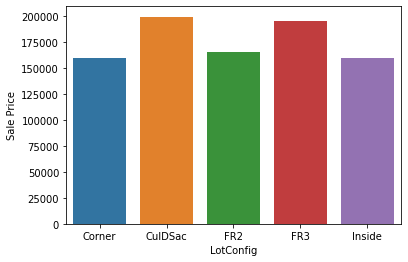

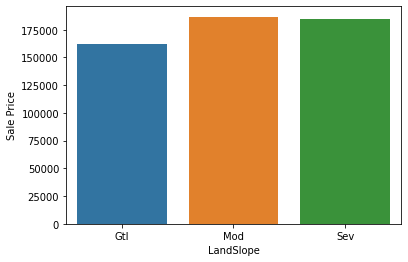

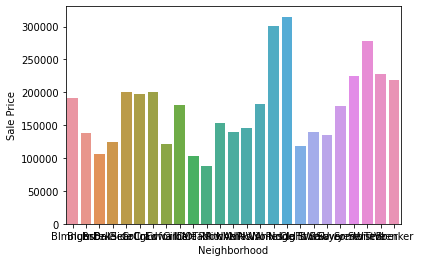

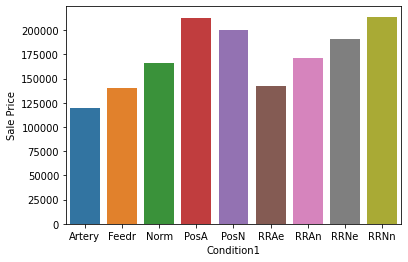

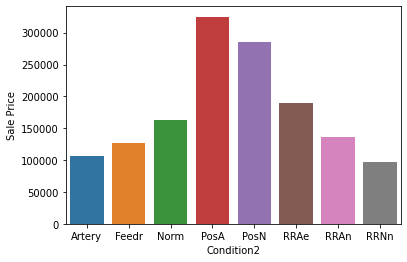

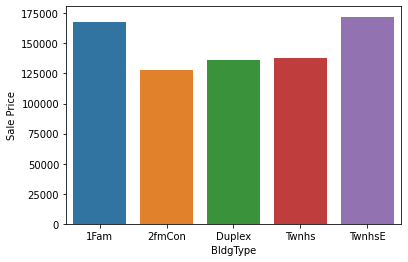

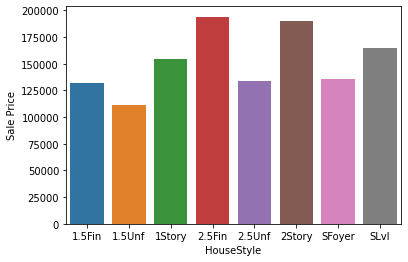

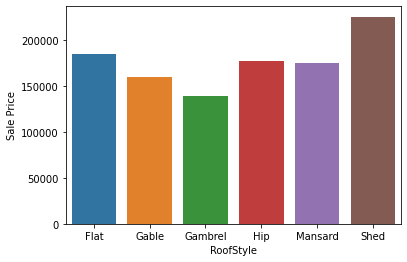

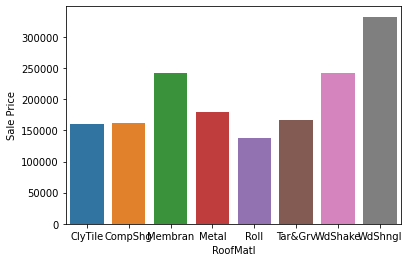

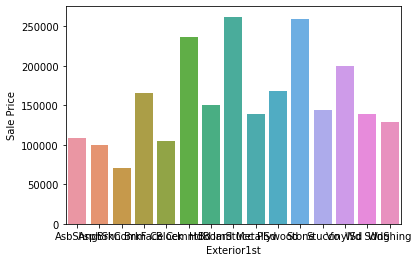

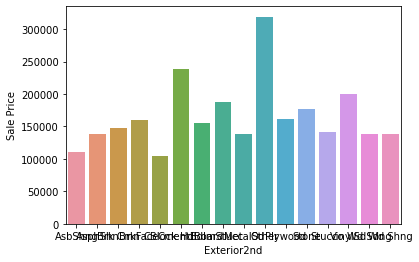

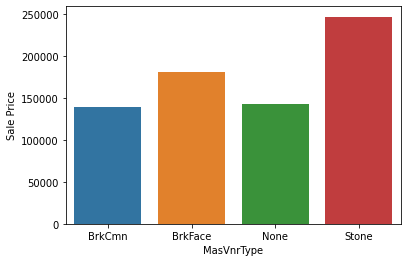

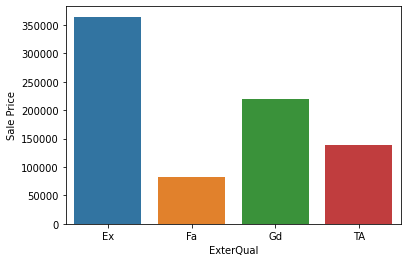

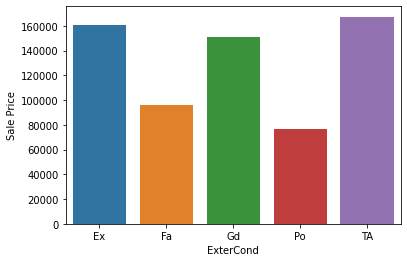

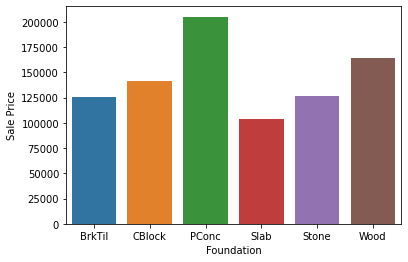

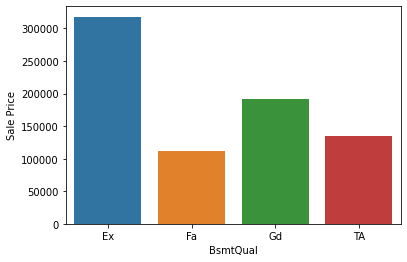

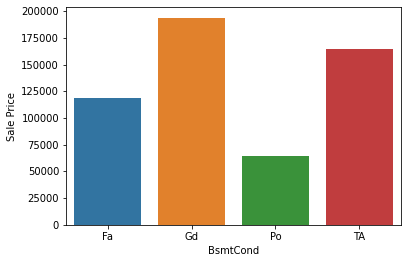

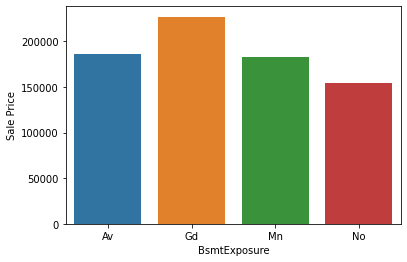

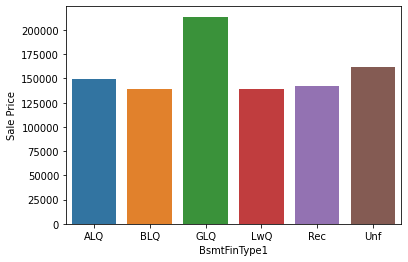

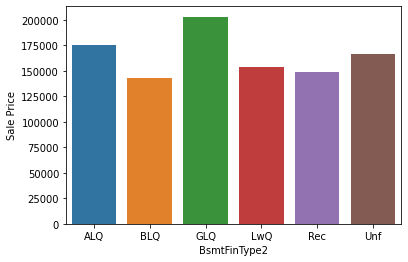

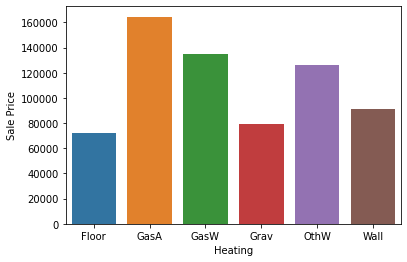

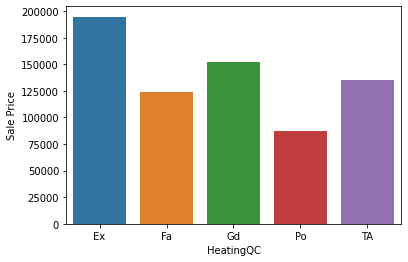

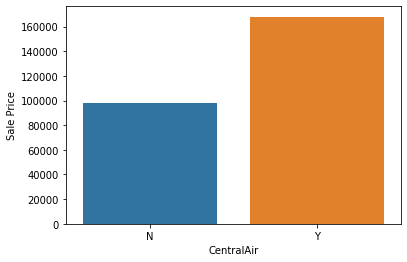

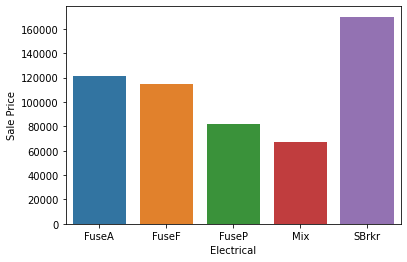

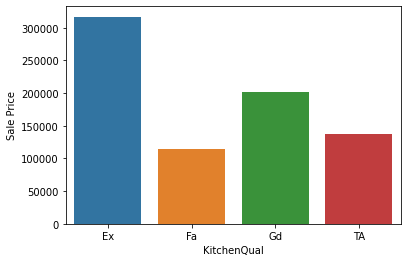

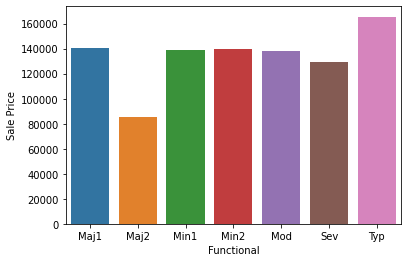

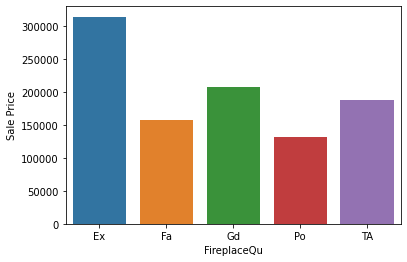

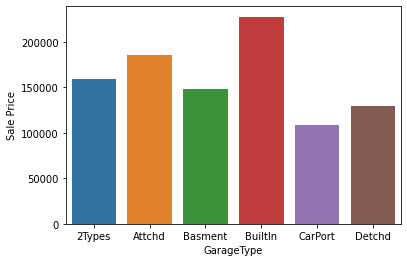

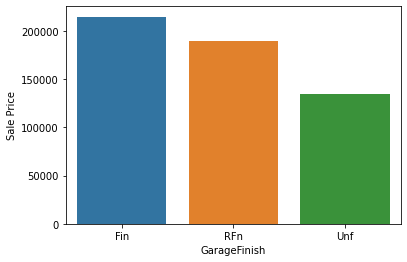

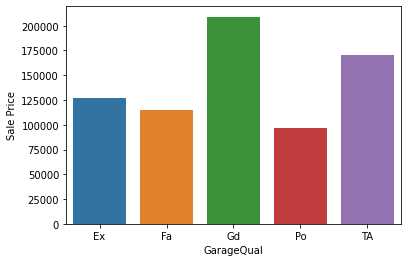

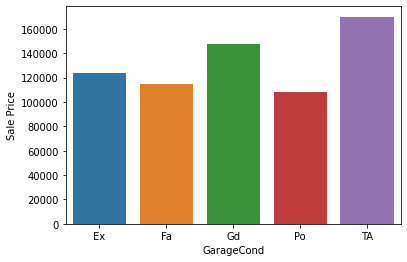

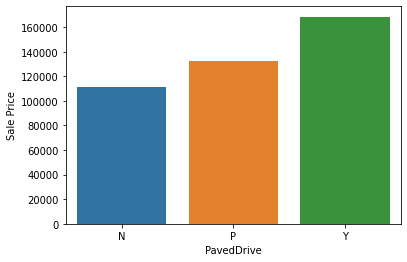

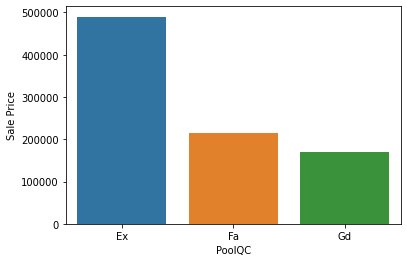

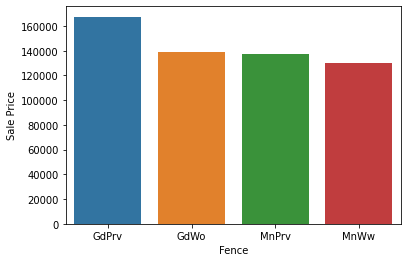

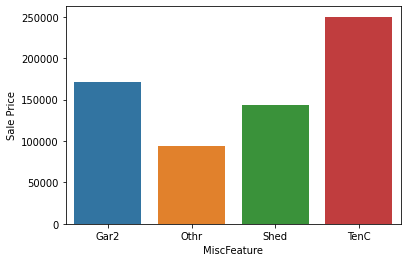

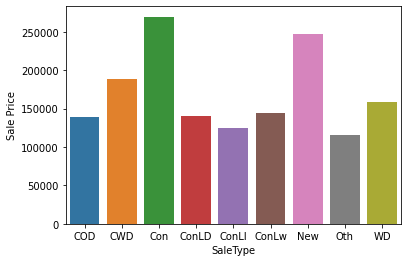

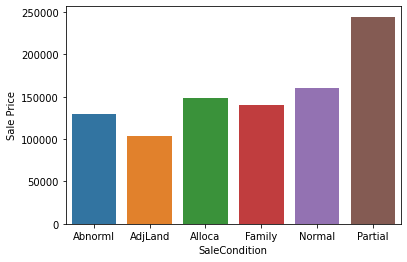

In [25]:
# Relationship between categorical features and sale price.
for feature in categorical_features:
    data = X_train.groupby(feature)['SalePrice'].median()
    data = pd.DataFrame(data) # Convert Series to DataFrame
    sns.barplot(x=data.index, y=data.SalePrice)
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

# Outliers

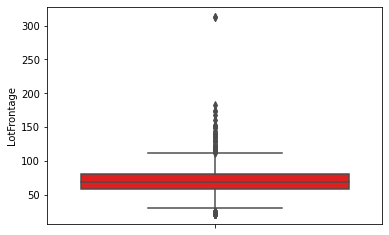

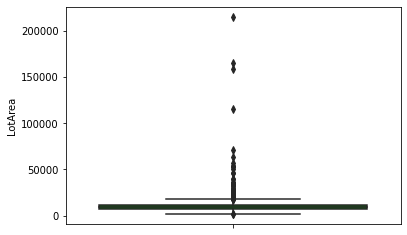

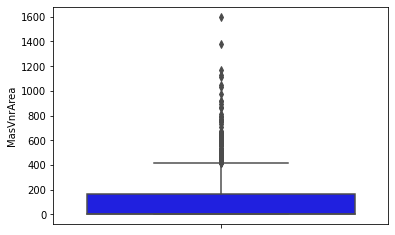

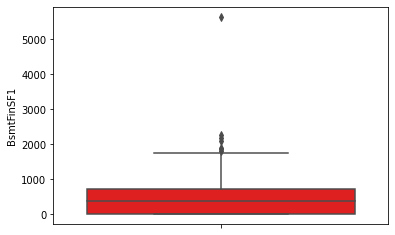

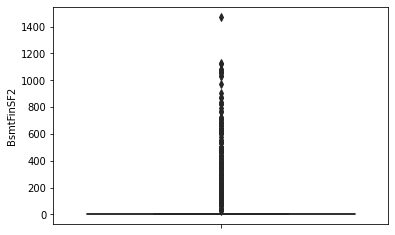

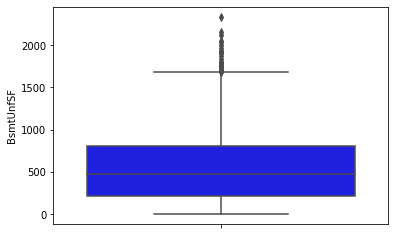

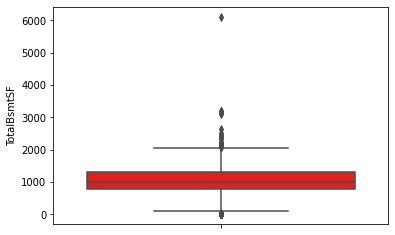

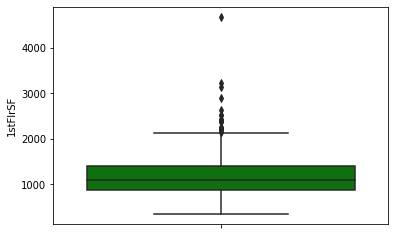

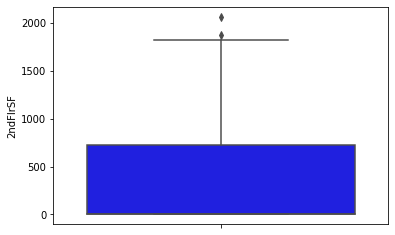

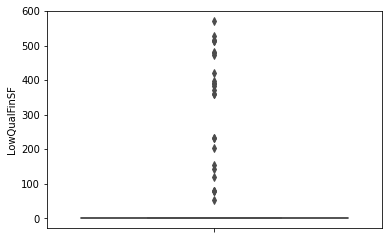

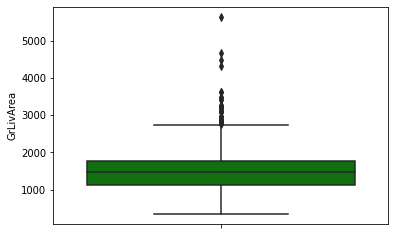

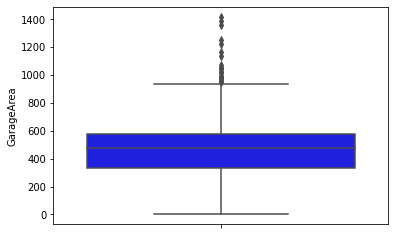

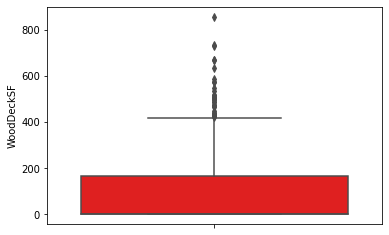

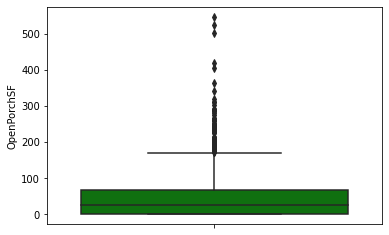

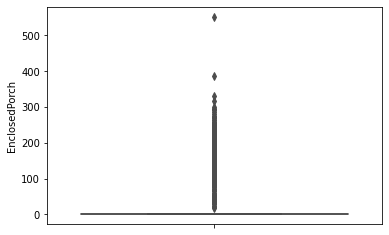

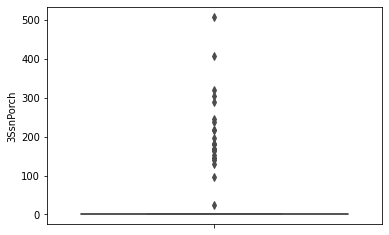

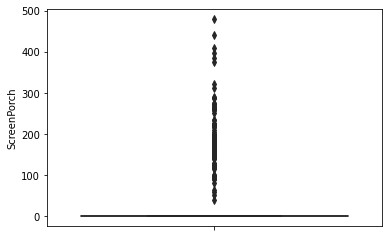

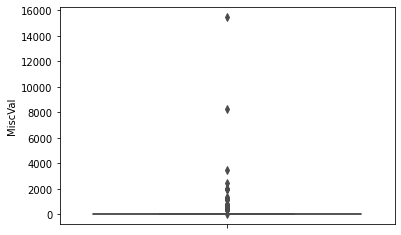

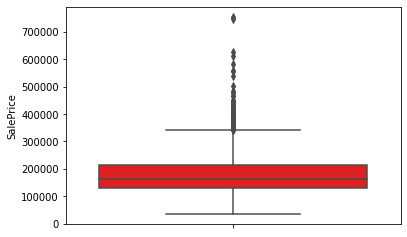

In [26]:
# Continuous Feature - Outliers
for feature in continuous_features:
    sns.boxplot(y=X_train[feature], color=colors[i%3])
    plt.ylabel(feature)
    plt.show()
    i+=1

### Interpretation
* Boxplot can detect outliers.
* This means that if any observations above or below 3*IQR (Inter Quartile Range) can be considered as an outlier.
* As seen in the above graphs, there are some features for which this is true and hence outliers are present.
* This can be more clearly explored once log transform is performed.
* Thus, now lets perform it finally.

## Log-Transformation
* This is a part of feature engineering but still we are performing it here to get bettern insights about outliers.
* Log gives a measurement of how "big" a number is in comparision to another number (base of log).
* Suppose we are comparing weights/mass of the heavenly bodies in solar system.
* 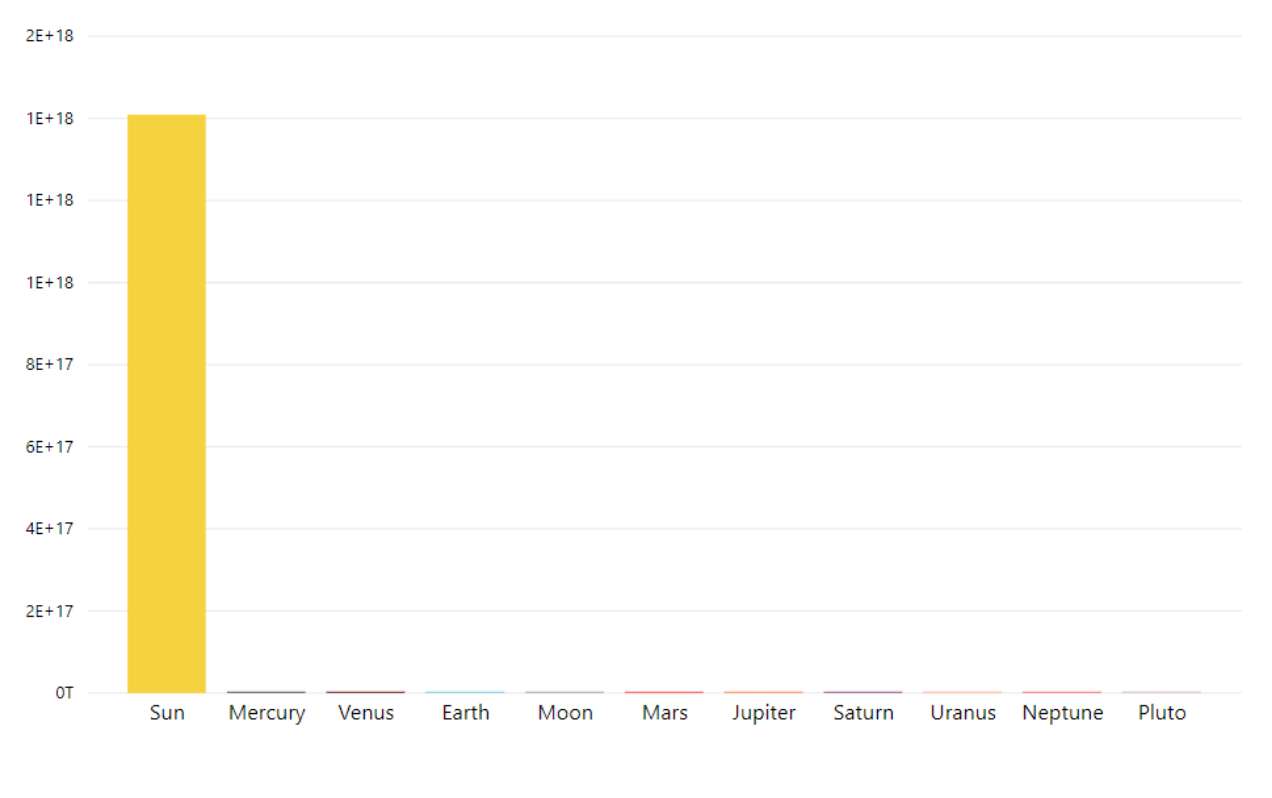
* Compared to Sun, all others seem to have similar mass.
* Now take log and then compare.
* 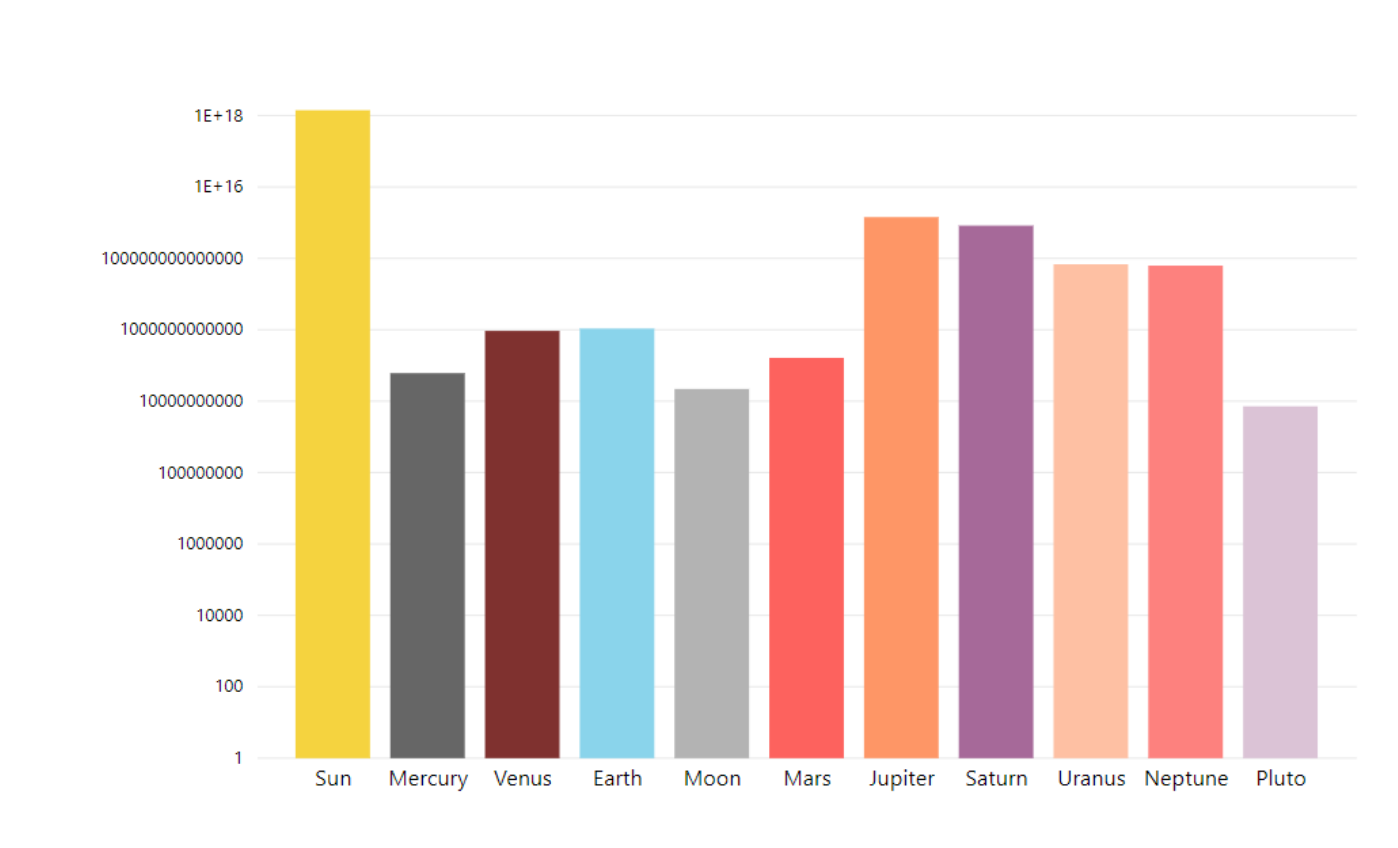
* Thus, log scales down the value that can be compared.

**Click [here](https://towardsdatascience.com/logarithms-what-why-and-how-ff9d050d3fd7) for the source.**

* Further, the larger values tend to bias the model and influence them to a great extent.
* **Logarithm scales the data, reduces the range of data, brings linearity to the data and removes skewness to a certain extent while preserving the distribution.**
* **Note that log-transformation should be used only for continuous features due to obviuous reasons.**

In [27]:
# Log transform the data
X_log_transform = X_train.copy() # Will not affect the real dataset
for feature in continuous_features:
    if feature != "SalePrice":
        X_log_transform[feature] = np.log1p(X_log_transform[feature])

In [28]:
# pd.pandas.set_option('display.max_columns', None)
X_log_transform.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,208500
1,20,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,181500
2,60,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,223500
3,70,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,140000
4,60,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,250000


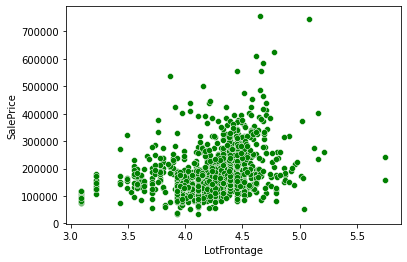

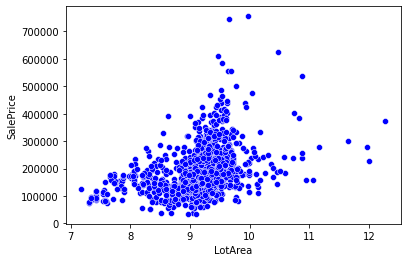

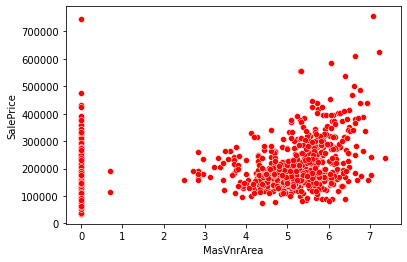

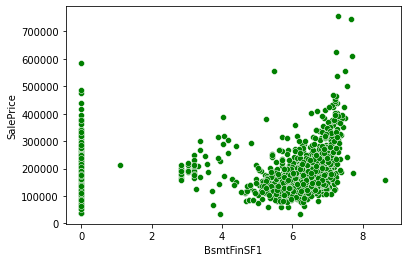

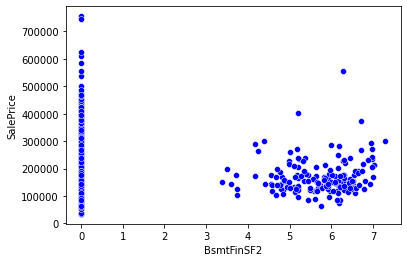

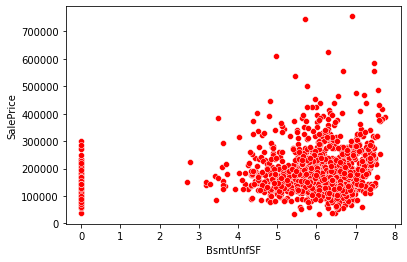

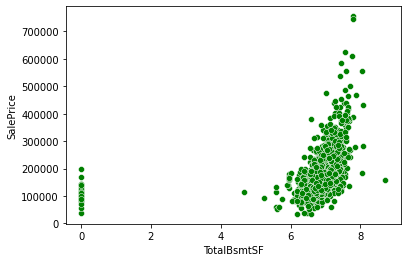

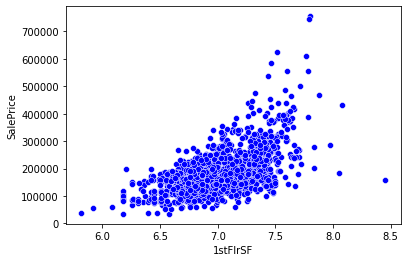

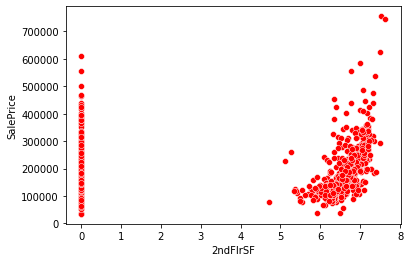

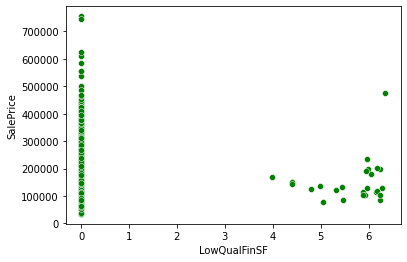

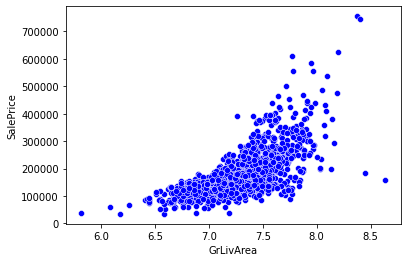

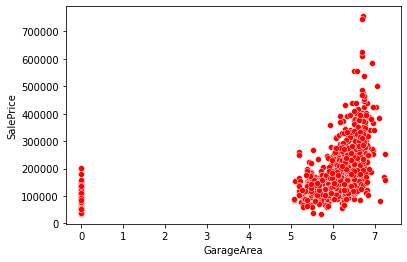

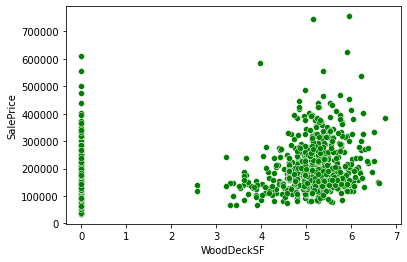

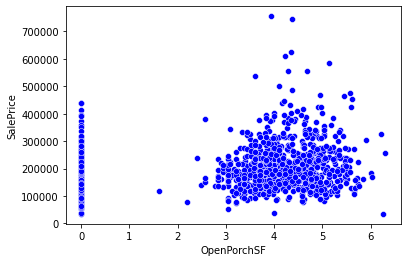

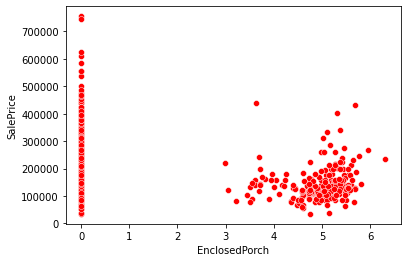

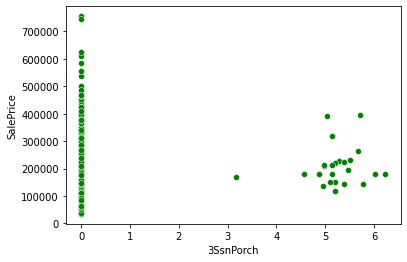

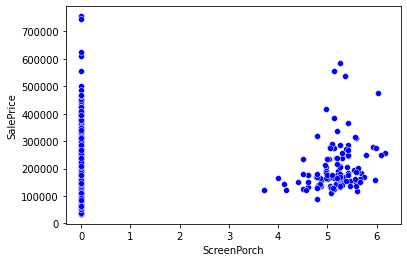

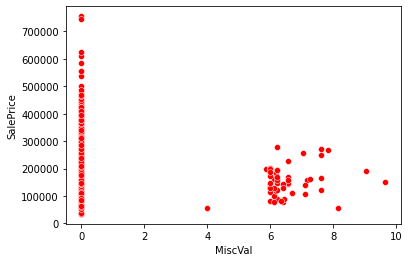

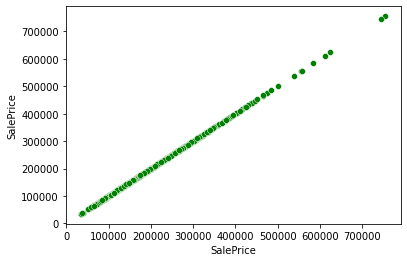

In [29]:
# Scatter plot between continuous feature and SalePrice
for feature in continuous_features:
    sns.scatterplot(x = X_log_transform[feature], y = X_log_transform["SalePrice"], color=colors[i%3])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()
    i+=1

### Interpretation
* From the above figures we can see that in some feature cases like GrLivArea, Garage Area etc, there is a positive relation.
* Hence, we can say that log transform did help us in visualizing and comparing the data set as it scales the continuous features.
* Another purpose of log transform is that it helps in making the skewed data, less skewed.
* Lets check that out.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


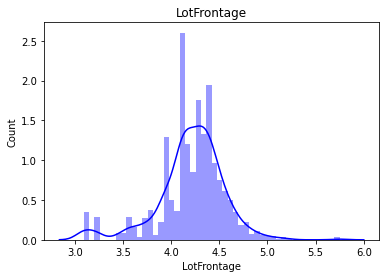

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


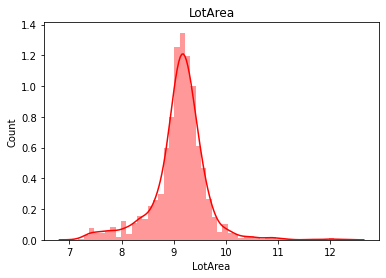

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


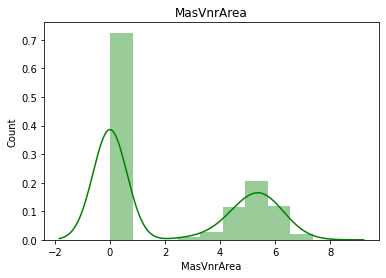

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


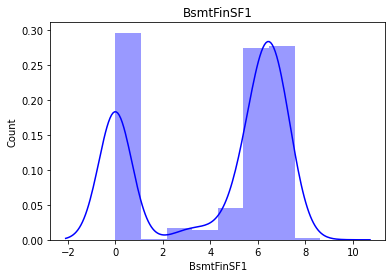

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


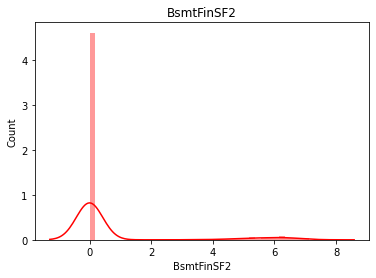

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


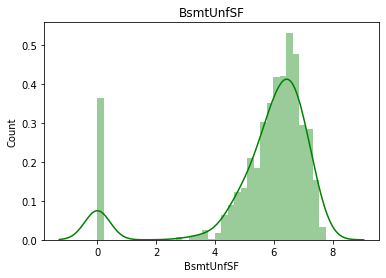

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


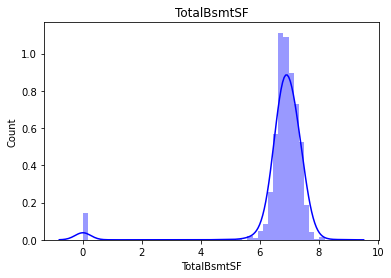

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


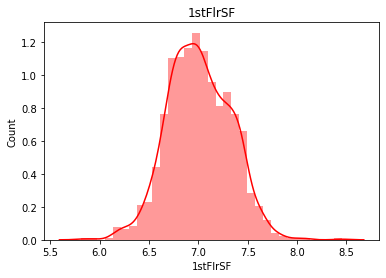

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


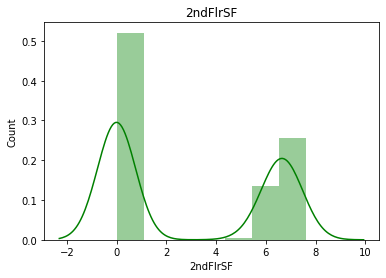

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


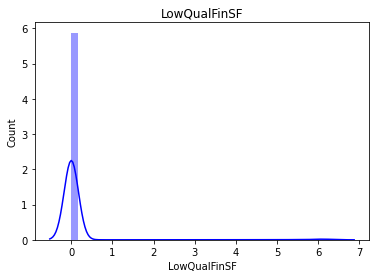

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


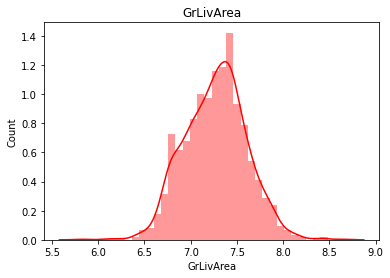

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


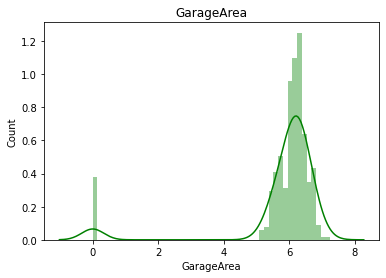

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


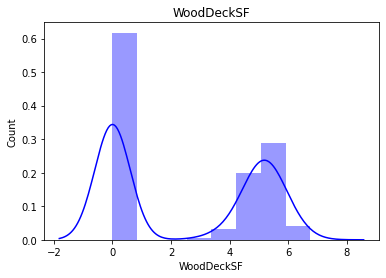

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


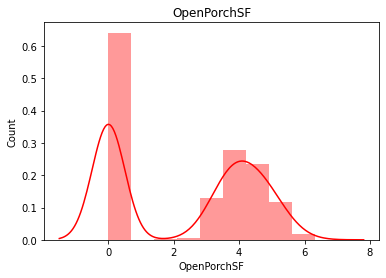

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


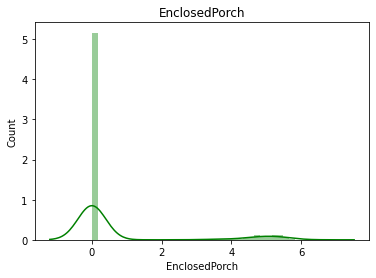

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


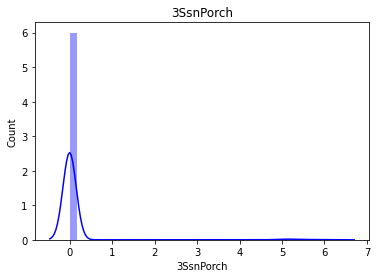

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


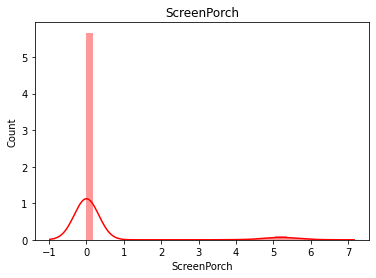

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


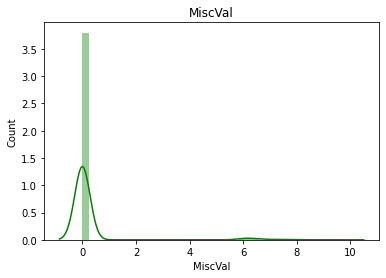

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


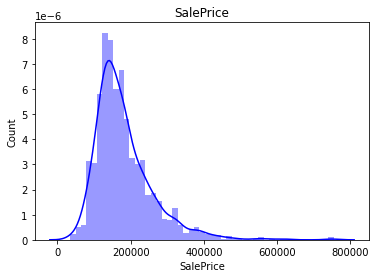

In [30]:
# Plotting distribution plot after log transform.
for feature in continuous_features:
    sns.distplot(X_log_transform[feature], kde=True, color=colors[i%3])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    i+=1

### Interpretation
* Here we can see that clearly many features have been normalised.
* Note that this might not be true for some feature that may follow bimodal or multimodal distribution.

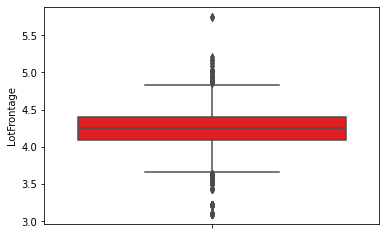

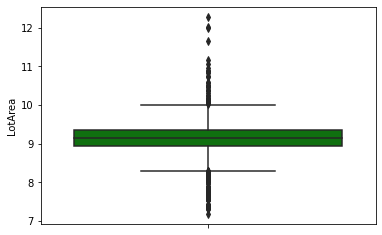

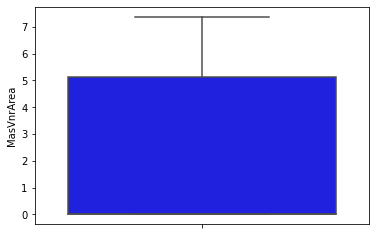

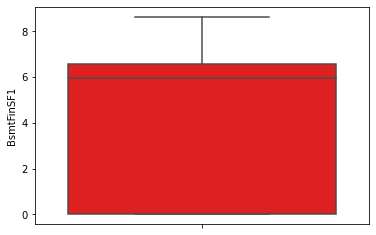

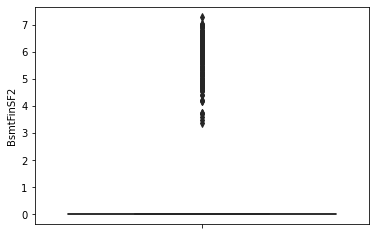

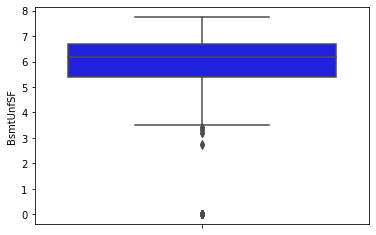

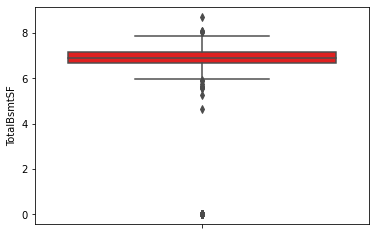

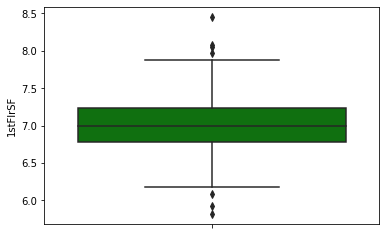

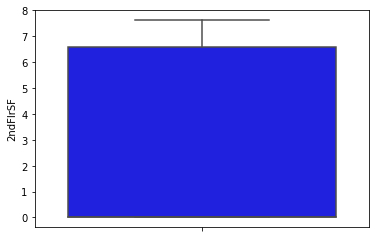

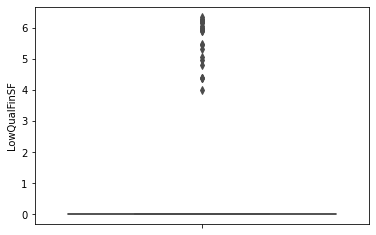

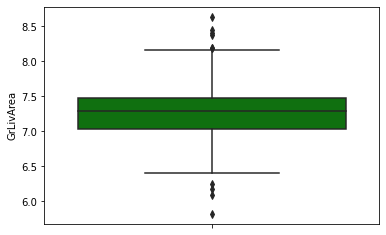

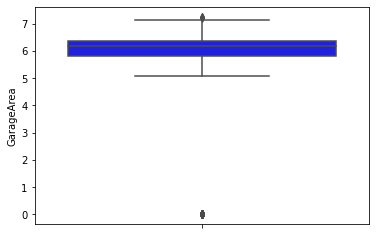

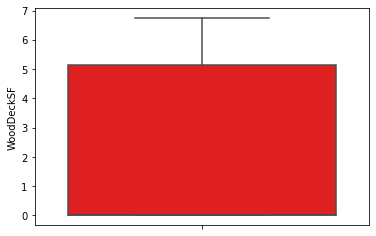

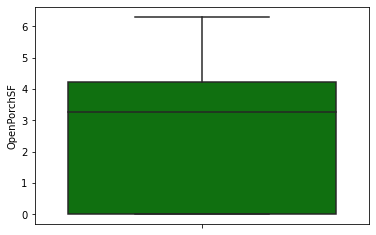

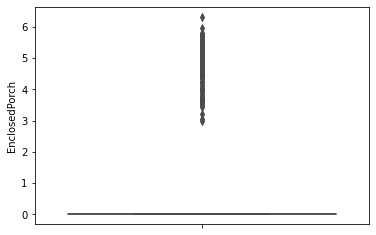

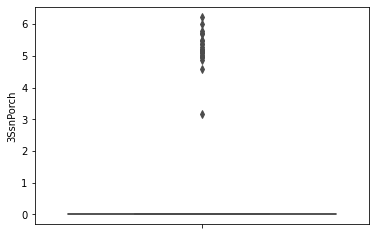

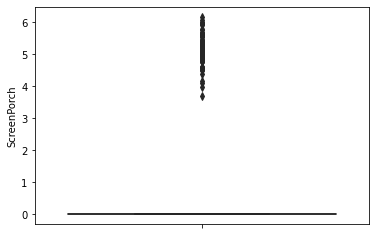

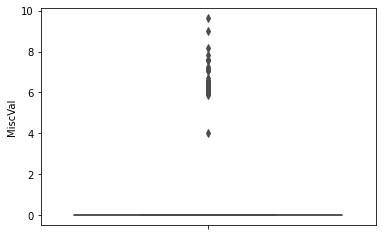

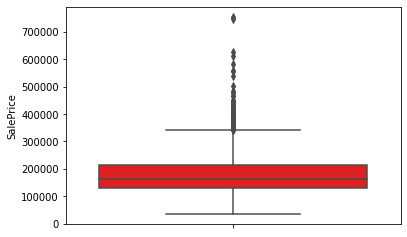

In [31]:
# Checking for outliers.
for feature in continuous_features:
    sns.boxplot(y=X_log_transform[feature], color=colors[i%3])
    plt.ylabel(feature)
    plt.show()
    i+=1

### Interpretation
* The above plot is better than default dataset.
* Even though there are still some features for which it is not clear whether outliers are there of not, there are many features that contain outliers like LotFrontage, LotArea etc.

# Conclusion
* Data Analysis is one of the most crucial step in Machine Learning Project.
* As evident from the above notebook, we get very great insights regarding the data.
* This will be helpful in other processes of the lifecycle including Feature Engineering, Feature Selection and Scaling.
* Stay tuned for these notebooks. Will be publishing them soon.